# The purpose of this Sprint
Understand SVM through scratch
Touch a method different from the linear model
How to learn
After implementing SVM with scratch, we will train and verify.

We will create a class of support vector machine (SVM, support vector machine) for classification by scratch. We will implement the algorithm using only the minimum library such as NumPy.

There are soft margin SVMs that allow classification errors during learning and hard margin SVMs that do not, but here we will deal with hard margin SVMs that are simple to implement.

The template is prepared below. Add some code to this ScratchSVMClassifier class.

PrototypeWe will create a class of support vector machine (SVM, support vector machine) for classification by scratch. We will implement the algorithm using only the minimum library such as NumPy.

There are soft margin SVMs that allow classification errors during learning and hard margin SVMs that do not, but here we will deal with hard margin SVMs that are simple to implement.

The template is prepared below. Add some code to this ScratchSVMClassifier class.

Prototype

In [19]:
import numpy as np
import matplotlib.pyplot as plt
class ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, d=1, gamma=1, theta=0):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.degree = d
        self.gamma = gamma
        self.theta = theta

    def fit(self, X, y, X_val=None, y_val=None):
        self.label = np.unique(y)
        y = np.where(y == self.label[0], -1, 1)
        
        self.lamda = np.random.rand(len(X))
        
        for i in range(self.iter):
            self._update_lambda(X,y)
            if self.verbose:
                print("iteration: {}, lamda: {}".format(i,self.lamda))
        self.index_support_vector = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.index_support_vector,:]
        self.y_sv = y[self.index_support_vector].reshape(-1,1)
        self.lam_sv = self.lamda[self.index_support_vector].reshape(-1,1)
        self.n_support_vectors = len(self.lam_sv)
    def predict(self, X):
        n = X.shape[0]
        y_pred = np.zeros(n)
        
        for i in range(n):
            temp = 0
            for j in range(self.n_support_vectors):
                # sum=lamba*Y*kERNEL FUNCTION
                temp += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            if temp >= 0:
                #IF GREATER THAN 0 CLASS 1
                y_pred[i] = self.label[1]
            else:
                #ELSE CLASS EQUALS -1
                y_pred[i] = self.label[0]
                
        return y_pred
    
    def _update_lambda(self, X, y):
        n = X.shape[0]
        
        for i in range(n):
            update_sum = 0
            for j in range(n):
                update_sum += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j]) 
            self.lamda[i] += self.lr*(1-update_sum)
            #sumof lambas=lr times 1- updated 
            if self.lamda[i] < 0:
                self.lamda[i] = 0
                
    def _kernel(self, X_i, X_j):
        if self.kernel =='polly':
          self.gamma = 1
          self.theta = 1
        return (self.gamma*np.dot(X_i,X_j.T) + self.theta)**self.degree
     

# 【problem 1】Lagrange’s steepest descent by the undetermined multiplier method
Lagrange’s undetermined multiplier method is used for SVM learning. Prepare Lagrange multiplier $\lambda$ for the number of samples and update it by the following formula. Implement the method that performs this calculation in the ScratchSVMClassifier class.
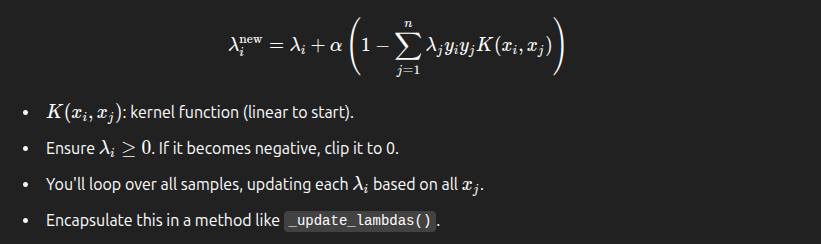



# 【problem 2】Support vector determination
A sample whose calculated Lagrange multiplier $ \ lambda $ is larger than the Settings threshold is treated as a support vector. You will need a support vector when estimating. Write the code to determine the support vector and keep it as an instance variable.

The threshold is a hyperparameter, but it is a good idea to start with about 1e-5. If you can output the number of support vectors, you can check whether the learning is done well.

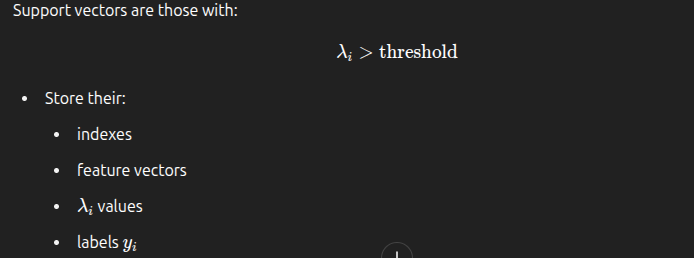


# 【problem 3】Estimated
At the time of estimation, the features of the data to be estimated and the features of the support vector are calculated using a kernel function. The sign of $f(x)$ obtained is the classification result.

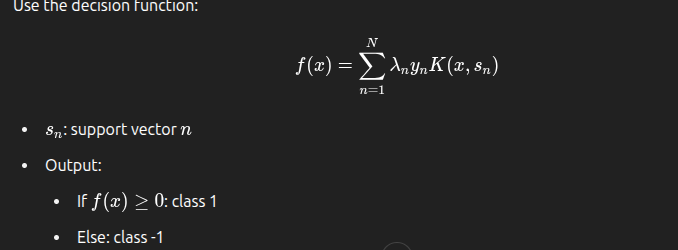

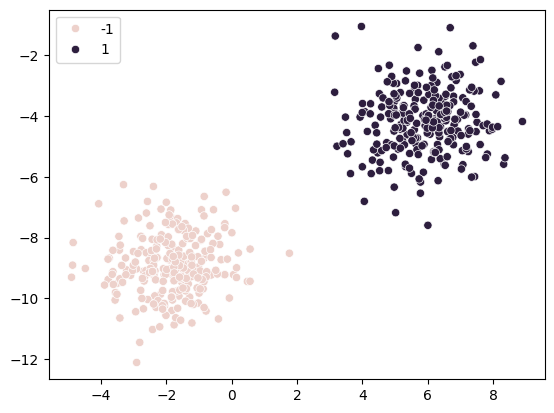

In [2]:
# importing datasets
from sklearn import datasets
X, y =  datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
     

import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()
     

# 【problem 4】Learning and estimation
Learn and estimate the scratch implementation for the binary classification of Simple Dataset 1 prepared in the Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,train_size =0.80)
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.
 -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
 -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(y_pred, y_test):
  print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
  print("precision: {}".format(precision_score(y_test,y_pred)))
  print("recall: {}".format(recall_score(y_test,y_pred)))
  print("f1: {}".format(f1_score(y_test,y_pred)))
evaluate(y_pred,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [10]:
from sklearn.svm import SVC
model_sk = SVC()
model_sk.fit(X_train,y_train)
y_pred_sk = model_sk.predict(X_test)
evaluate(y_pred_sk,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


# 【problem5】Visualization of decision area
Visualise the decision area.

Show support vectors in different colors as in the example below

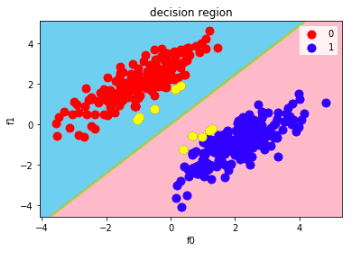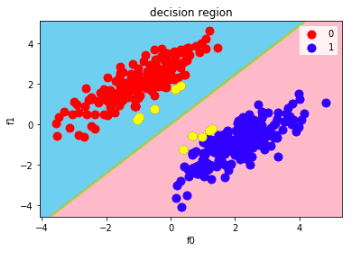

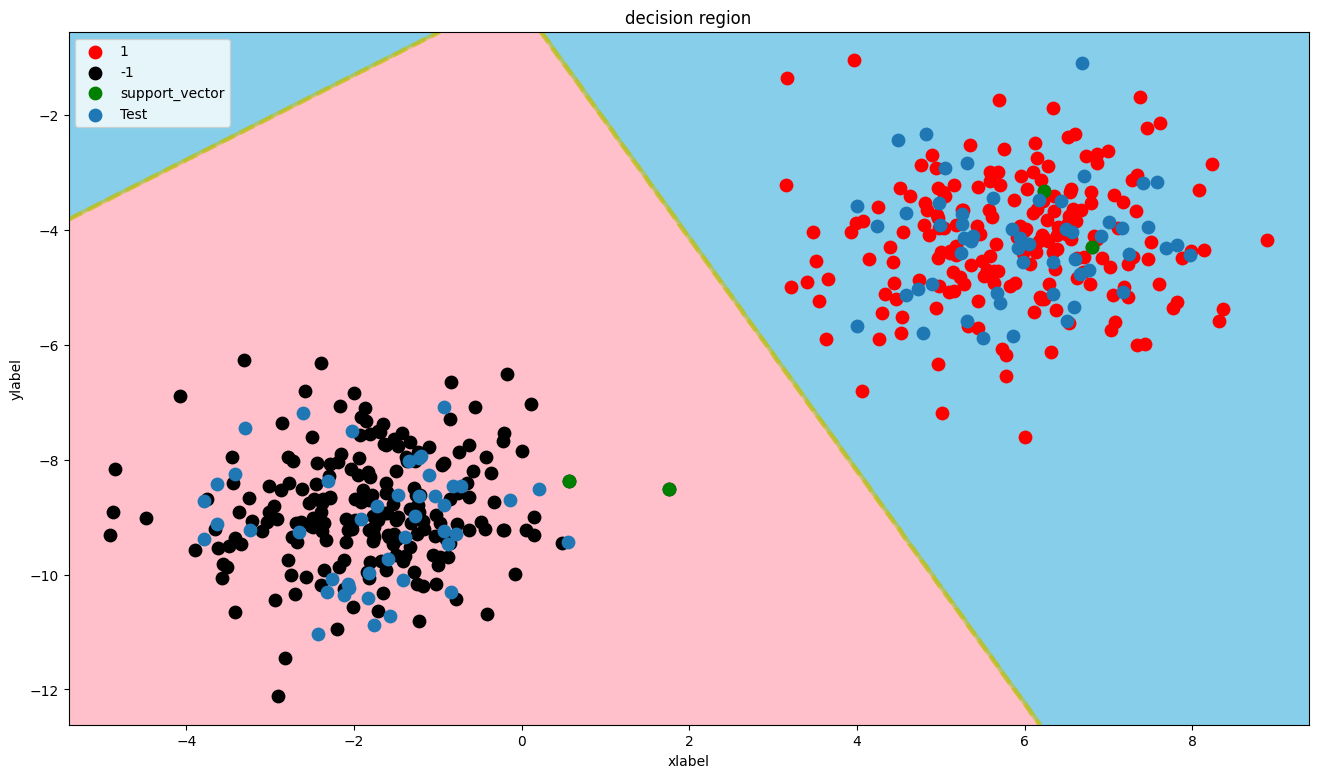

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    scatter_color = ['red', 'black']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, lr=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='green', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

# 【problem 6】(Advance task) Creation of polynomial kernel function
The first implementation I created used a linear kernel. Let’s also switch to the polynomial kernel.

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


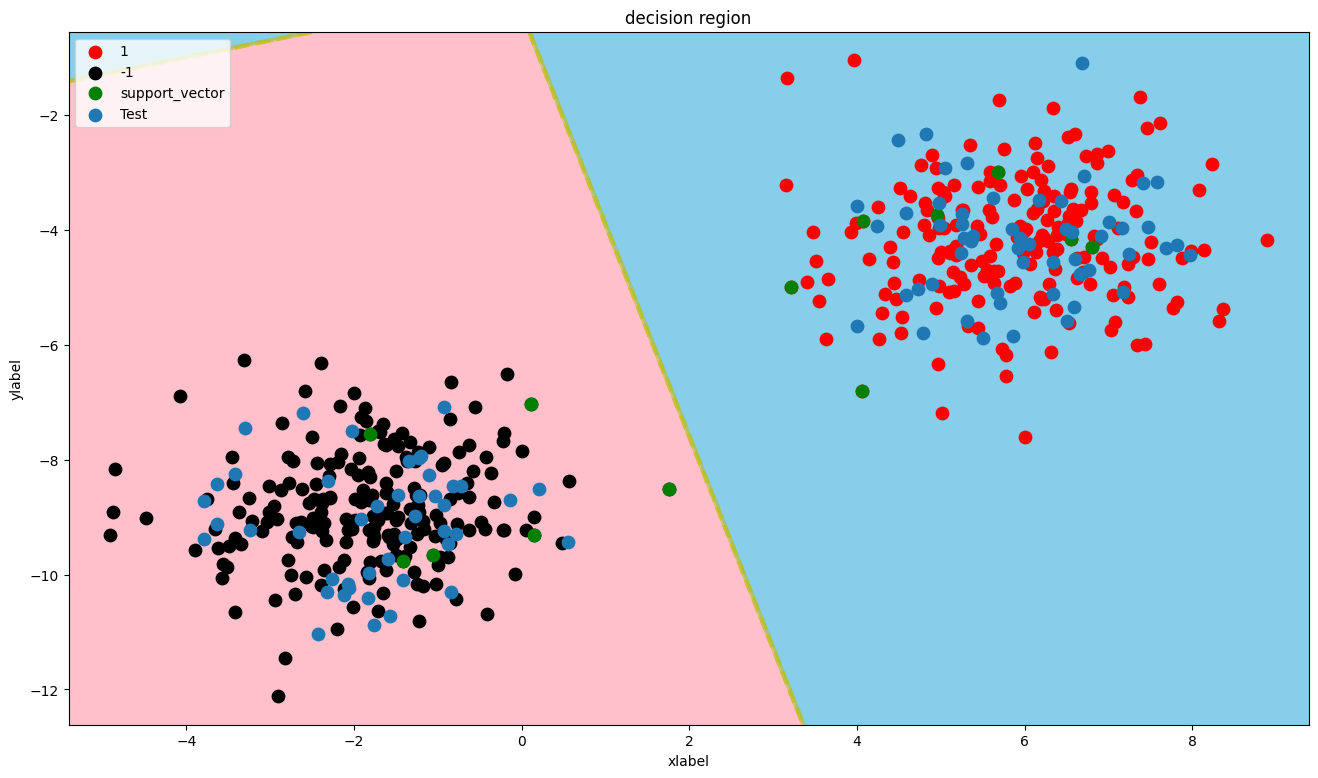

In [20]:
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False,kernel="polly",d=2)
model.fit(X_train,y_train)
y_pred_polly = model.predict(X_test)
evaluate(y_pred=y_pred_polly,y_test=y_test)
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();